In [1]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [2]:
# Execute the codes in TensorFlow 2.0 without editing those in version 1.x (except for the contrib module).
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [4]:
data_raw = load_iris()
X = data_raw['data']
y = data_raw['target'].reshape(-1, 1)


In [5]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Convert into a DataFrame and view.
header = ['SepalLength','SepalWidth','PetalLength','PetalWidth']      # Column names
df = pd.DataFrame(X_scaled,columns=header)
df.head(3)

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667


In [7]:
# Reduce to 2 dimension.
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

In [8]:
# Convert the integer labels into color names.
mycolor = []
for i in y:
    if i == 0:
        mycolor.append('red')
    elif i == 1:
        mycolor.append('green')
    else:
        mycolor.append('blue')

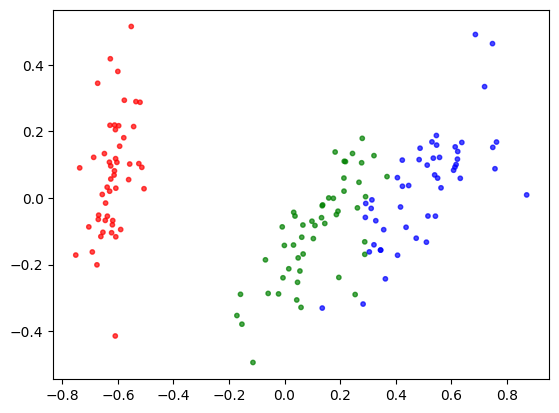

In [9]:
# Visualize.
plt.scatter(X_pca[:,0],X_pca[:,1],marker="o",alpha=0.7, s=10, c=mycolor)
plt.show()

In [10]:
# Hyperparameters definition
n_input = 4             # Input layers has as many nodes as the number of variables.
n_hidden = 2            # The number of nodes in the hidden layer = 2 <= my target.
n_output = n_input      # The output should have the same number of nodes as the input.
learn_rate = 0.0001
n_epochs = 10001

In [11]:
# Variables definition
initializer = tf.variance_scaling_initializer()
W1 = tf.Variable(initializer([n_input, n_hidden]), dtype=tf.float32)
W2 = tf.Variable(initializer([n_hidden, n_output]), dtype=tf.float32)
b1 = tf.Variable(tf.zeros(n_hidden))
b2 = tf.Variable(tf.zeros(n_output))

In [12]:
# Placeholder definition
X_ph = tf.placeholder(tf.float32, shape=[None, n_input])

In [13]:
# AutoEncoder model definition
hidden_layer = tf.matmul(X_ph, W1) + b1                  # No activation.
y_model = tf.matmul(hidden_layer, W2) + b2

In [14]:
loss = tf.reduce_mean(tf.square(X_ph- y_model))         # 'X' takes the place of 'y'.

In [15]:
optimizer = tf.train.AdamOptimizer(learning_rate = learn_rate)

In [16]:
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()

In [17]:
with tf.Session() as sess:
        sess.run(init)
        for i in range(n_epochs):
            my_feed = {X_ph:X_scaled}
            sess.run(train, feed_dict = my_feed)
            if i % 1000 == 0:
                mse = sess.run(loss, feed_dict = my_feed)
                print("Step : {}    ,    MSE : {}".format(i, mse))
        X_auto = sess.run(hidden_layer, feed_dict = my_feed)       # Get the reduced dimensional representation from the hidden layer!!!

Step : 0    ,    MSE : 0.5486080646514893
Step : 1000    ,    MSE : 0.24051915109157562
Step : 2000    ,    MSE : 0.13132087886333466
Step : 3000    ,    MSE : 0.07966606318950653
Step : 4000    ,    MSE : 0.05288722738623619
Step : 5000    ,    MSE : 0.038280975073575974
Step : 6000    ,    MSE : 0.0296492800116539
Step : 7000    ,    MSE : 0.023380642756819725
Step : 8000    ,    MSE : 0.017020901665091515
Step : 9000    ,    MSE : 0.01139594241976738
Step : 10000    ,    MSE : 0.008174167945981026


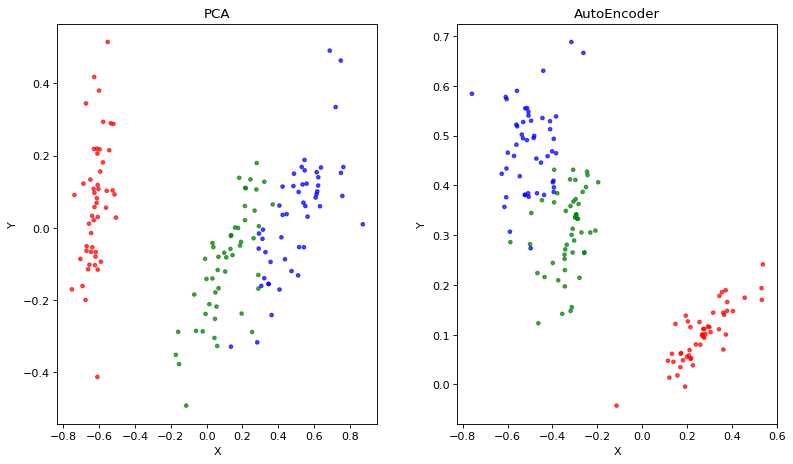

In [18]:
fig=plt.figure(figsize=(10,5), dpi=80)       # figsize= (Width, Height). Set DPI.
axes1 = fig.add_axes([0,0,0.4,1])            # Left, Bottom, Width, Height
axes2 = fig.add_axes([0.5,0,0.4,1])          # Left, Bottom, Width, Height
axes1.scatter(X_pca[:,0],X_pca[:,1],marker="o",alpha=0.7, s=10, c=mycolor)
axes2.scatter(X_auto[:,0],X_auto[:,1],marker="o",alpha=0.7, s=10, c=mycolor)
axes1.set_xlabel('X')
axes1.set_ylabel('Y')
axes1.set_title('PCA')
axes2.set_xlabel('X')
axes2.set_ylabel('Y')
axes2.set_title('AutoEncoder')
plt.show()